<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [ ]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [ ]:
# To-Do: create a virtual environement called data_analytics
! python -m venv data_analytics

In [ ]:
# Activate the environement for windows
!source data_analytics/bin/activate

In [ ]:
# Activate the environement for linux (debian based)
!. data_analytics/bin/activate

### 2. Importing necessary tools:<a id='importing'></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [24]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df = pd.read_csv("kc_house_data.csv")
df.head()
# To-Do: Print the dataframe's shape
df.shape
df.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503


In [25]:
# To-Do: Print the dataframe's info
df.info
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [26]:
# To-Do: deal with the NAs in your dataset in one line
df.isna()
df.dropna(inplace=True)
df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [27]:
# To-Do: delete the values of the variables that are useles
del df['id']
del df['zipcode']


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21588 non-null  object 
 1   price          21588 non-null  float64
 2   bedrooms       21588 non-null  int64  
 3   bathrooms      21588 non-null  float64
 4   sqft_living    21588 non-null  float64
 5   sqft_lot       21588 non-null  float64
 6   floors         21588 non-null  float64
 7   waterfront     21588 non-null  int64  
 8   view           21588 non-null  int64  
 9   condition      21588 non-null  int64  
 10  grade          21588 non-null  int64  
 11  sqft_above     21588 non-null  float64
 12  sqft_basement  21588 non-null  int64  
 13  yr_built       21588 non-null  float64
 14  yr_renovated   21588 non-null  float64
 15  lat            21588 non-null  float64
 16  long           21588 non-null  float64
 17  sqft_living15  21588 non-null  float64
 18  sqft_l

### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

In [29]:
# To-Do : get to know more your data WITHOUT modifying it !!
df.describe()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.158800e+04,21588.000000,21588.000000,21588.000000,2.158800e+04,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000
mean,5.401545e+05,3.370576,2.114670,2079.916528,1.511370e+04,1.494187,0.007550,0.234297,3.409626,7.656985,1788.385353,291.531175,1971.004910,84.408329,47.560054,-122.213889,1986.594265,12771.769826
std,3.671493e+05,0.929870,0.770085,918.538221,4.144320e+04,0.539989,0.086567,0.766200,0.650932,1.175540,828.218416,442.624173,29.365908,401.694992,0.138558,0.140825,685.364986,27316.243753
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219875e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [30]:
# To-Do : detect the outliers then delete them ad delete the column created to calculate the Z-score
df["price_zscore"] = ((df.price - df.price.mean())/ df.price.std())
df= df[df["price_zscore"]>3]
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price_zscore
21,20140826T000000,2000000.0,3,2.75,3050.0,44867.0,1.0,0,4,3,9,2330.0,720,1968.0,0.0,47.5316,-122.233,4110.0,20336,3.976163
153,20150401T000000,2250000.0,4,3.25,5180.0,19850.0,2.0,0,3,3,12,3540.0,1640,2006.0,0.0,47.5620,-122.162,3160.0,9750,4.657085
246,20140929T000000,2400000.0,4,2.50,3650.0,8354.0,1.0,1,4,3,9,1830.0,1820,2000.0,0.0,47.6338,-122.072,3120.0,18841,5.065638
269,20150504T000000,2900000.0,4,3.25,5050.0,20100.0,1.5,0,2,3,11,4750.0,300,1982.0,2008.0,47.6312,-122.223,3890.0,20060,6.427482
282,20150513T000000,2050000.0,5,3.00,3830.0,8480.0,2.0,0,1,5,9,2630.0,1200,1905.0,1994.0,47.6166,-122.287,3050.0,7556,4.112347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,20150227T000000,1865000.0,4,3.75,3790.0,8797.0,2.0,0,0,3,11,3290.0,500,2006.0,0.0,47.6351,-122.236,2660.0,12150,3.608465
21530,20150407T000000,3000000.0,4,3.75,5090.0,14823.0,1.0,0,0,3,11,4180.0,910,2013.0,0.0,47.6200,-122.207,3030.0,12752,6.699850
21540,20150113T000000,1881580.0,5,3.50,4410.0,13000.0,2.0,0,3,3,10,2920.0,1490,2014.0,0.0,47.5382,-122.111,5790.0,12969,3.653624
21568,20150130T000000,1700000.0,4,3.50,3830.0,8963.0,2.0,0,0,3,10,3120.0,710,2014.0,0.0,47.5990,-122.197,2190.0,10777,3.159057


In [31]:
del df['price_zscore']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 21 to 21576
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           405 non-null    object 
 1   price          405 non-null    float64
 2   bedrooms       405 non-null    int64  
 3   bathrooms      405 non-null    float64
 4   sqft_living    405 non-null    float64
 5   sqft_lot       405 non-null    float64
 6   floors         405 non-null    float64
 7   waterfront     405 non-null    int64  
 8   view           405 non-null    int64  
 9   condition      405 non-null    int64  
 10  grade          405 non-null    int64  
 11  sqft_above     405 non-null    float64
 12  sqft_basement  405 non-null    int64  
 13  yr_built       405 non-null    float64
 14  yr_renovated   405 non-null    float64
 15  lat            405 non-null    float64
 16  long           405 non-null    float64
 17  sqft_living15  405 non-null    float64
 18  sqft_lo

### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

In [32]:
# To-Do : perform feature selection using correlation
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.189290,0.460795,0.599631,-0.044052,0.036828,0.220422,0.196586,-0.042742,0.396800,0.465029,0.328128,0.009312,0.043745,0.054533,-0.072504,0.214098,0.001188
bedrooms,0.189290,1.000000,0.427067,0.402132,-0.085008,0.181461,-0.185200,-0.114861,0.053567,0.081547,0.325971,0.198706,-0.067134,-0.034653,0.038653,-0.014286,0.116083,-0.082147
bathrooms,0.460795,0.427067,1.000000,0.715722,0.075766,0.200562,-0.113222,-0.024007,-0.215557,0.477499,0.627471,0.282087,0.296837,-0.106462,-0.012192,0.140179,0.107454,0.076847
sqft_living,0.599631,0.402132,0.715722,1.000000,0.145417,0.224193,-0.062433,0.008835,-0.136512,0.598503,0.816237,0.485612,0.173996,-0.073138,-0.061677,0.220830,0.280647,0.213038
sqft_lot,-0.044052,-0.085008,0.075766,0.145417,1.000000,0.096867,-0.052431,-0.006204,-0.095415,0.172398,0.205789,-0.061171,0.136753,-0.070380,-0.111021,0.515575,-0.032870,0.781135
floors,0.036828,0.181461,0.200562,0.224193,0.096867,1.000000,-0.046403,-0.052277,-0.089357,0.262573,0.410336,-0.235130,0.056441,-0.106416,0.009165,-0.059578,-0.087520,0.030301
waterfront,0.220422,-0.185200,-0.113222,-0.062433,-0.052431,-0.046403,1.000000,0.592555,0.003690,-0.127055,-0.139126,0.103090,-0.013852,0.069957,-0.059590,0.079382,-0.058957,-0.013907
view,0.196586,-0.114861,-0.024007,0.008835,-0.006204,-0.052277,0.592555,1.000000,0.127567,-0.028026,-0.169115,0.271098,-0.055458,0.045237,-0.021031,-0.063326,0.084537,0.004152
condition,-0.042742,0.053567,-0.215557,-0.136512,-0.095415,-0.089357,0.003690,0.127567,1.000000,-0.237628,-0.260298,0.158974,-0.546310,-0.100233,0.031030,-0.260527,0.065095,-0.080153
grade,0.396800,0.081547,0.477499,0.598503,0.172398,0.262573,-0.127055,-0.028026,-0.237628,1.000000,0.601957,0.118994,0.349513,-0.219151,-0.107003,0.168156,0.269792,0.212541


<AxesSubplot:>

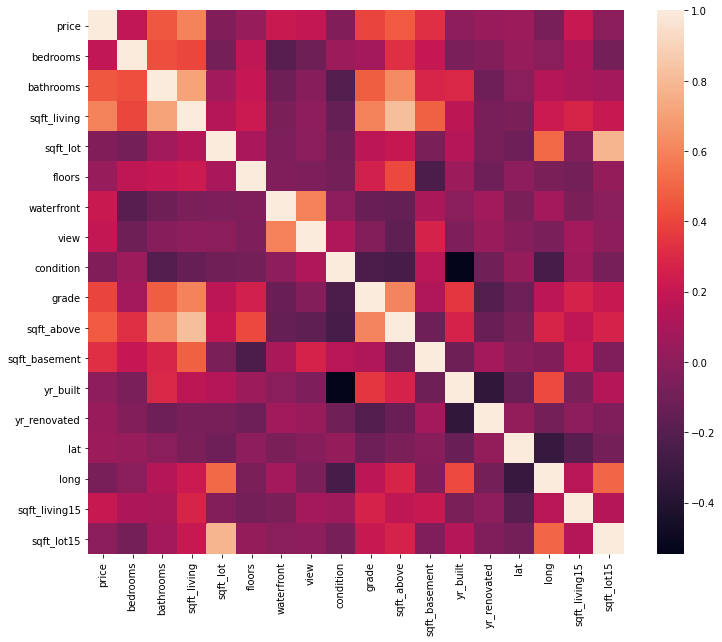

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

In [34]:
# To-Do : drop the variables that seem highly correlated to you
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(df ,0.8)
len(set(corr_features))
corr_features

{'sqft_above'}

In [36]:
df.drop(corr_features,axis=1)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
21,20140826T000000,2000000.0,3,2.75,3050.0,44867.0,1.0,0,4,3,9,720,1968.0,0.0,47.5316,-122.233,4110.0,20336
153,20150401T000000,2250000.0,4,3.25,5180.0,19850.0,2.0,0,3,3,12,1640,2006.0,0.0,47.5620,-122.162,3160.0,9750
246,20140929T000000,2400000.0,4,2.50,3650.0,8354.0,1.0,1,4,3,9,1820,2000.0,0.0,47.6338,-122.072,3120.0,18841
269,20150504T000000,2900000.0,4,3.25,5050.0,20100.0,1.5,0,2,3,11,300,1982.0,2008.0,47.6312,-122.223,3890.0,20060
282,20150513T000000,2050000.0,5,3.00,3830.0,8480.0,2.0,0,1,5,9,1200,1905.0,1994.0,47.6166,-122.287,3050.0,7556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,20150227T000000,1865000.0,4,3.75,3790.0,8797.0,2.0,0,0,3,11,500,2006.0,0.0,47.6351,-122.236,2660.0,12150
21530,20150407T000000,3000000.0,4,3.75,5090.0,14823.0,1.0,0,0,3,11,910,2013.0,0.0,47.6200,-122.207,3030.0,12752
21540,20150113T000000,1881580.0,5,3.50,4410.0,13000.0,2.0,0,3,3,10,1490,2014.0,0.0,47.5382,-122.111,5790.0,12969
21568,20150130T000000,1700000.0,4,3.50,3830.0,8963.0,2.0,0,0,3,10,710,2014.0,0.0,47.5990,-122.197,2190.0,10777


In [37]:
#deleting some useless feature
del df["yr_built"]
del df["yr_renovated"]
del df["date"]

### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [38]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
21,2000000.0,3,2.75,3050.0,44867.0,1.0,0,4,3,9,2330.0,720,47.5316,-122.233,4110.0,20336
153,2250000.0,4,3.25,5180.0,19850.0,2.0,0,3,3,12,3540.0,1640,47.5620,-122.162,3160.0,9750
246,2400000.0,4,2.50,3650.0,8354.0,1.0,1,4,3,9,1830.0,1820,47.6338,-122.072,3120.0,18841
269,2900000.0,4,3.25,5050.0,20100.0,1.5,0,2,3,11,4750.0,300,47.6312,-122.223,3890.0,20060
282,2050000.0,5,3.00,3830.0,8480.0,2.0,0,1,5,9,2630.0,1200,47.6166,-122.287,3050.0,7556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,1865000.0,4,3.75,3790.0,8797.0,2.0,0,0,3,11,3290.0,500,47.6351,-122.236,2660.0,12150
21530,3000000.0,4,3.75,5090.0,14823.0,1.0,0,0,3,11,4180.0,910,47.6200,-122.207,3030.0,12752
21540,1881580.0,5,3.50,4410.0,13000.0,2.0,0,3,3,10,2920.0,1490,47.5382,-122.111,5790.0,12969
21568,1700000.0,4,3.50,3830.0,8963.0,2.0,0,0,3,10,3120.0,710,47.5990,-122.197,2190.0,10777


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
linreg= linear_model.LinearRegression()
linreg.fit(X,Y)


LinearRegression()

In [41]:
linreg.coef_

array([-1.90609532e+04,  7.88591882e+04,  1.96578119e+02,  1.07072978e+00,
       -2.94686421e+05,  6.42711226e+05,  2.70775614e+03,  1.73599222e+04,
        6.77170763e+04,  1.61436700e+02,  3.51414177e+01,  8.38523657e+05,
       -2.22495440e+06,  9.34661959e+01, -2.96048575e+00])

In [42]:
linreg.intercept_

-311953845.7375459

In [44]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
linreg.score(X, Y)

0.5319719397750697

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.